In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file

df=pd.read_csv("D:\Projects\Abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data Cleaning

In [3]:
df.shape

(4177, 9)

df.columns

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isnull().sum() 

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

as we can see there is no null values so it's a clean dataframe

In [9]:
dummies=pd.get_dummies(df.Sex)
data=pd.concat([df,dummies],axis=1)
data=data.drop(['Sex','I'],axis=1)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0


as we can see, 'Sex' column is in the form of characters so we have changed it to numbers and avoid multicollinearity we have removed 'I' coulmn as it can be derived from 'M' and 'F' column

# EDA

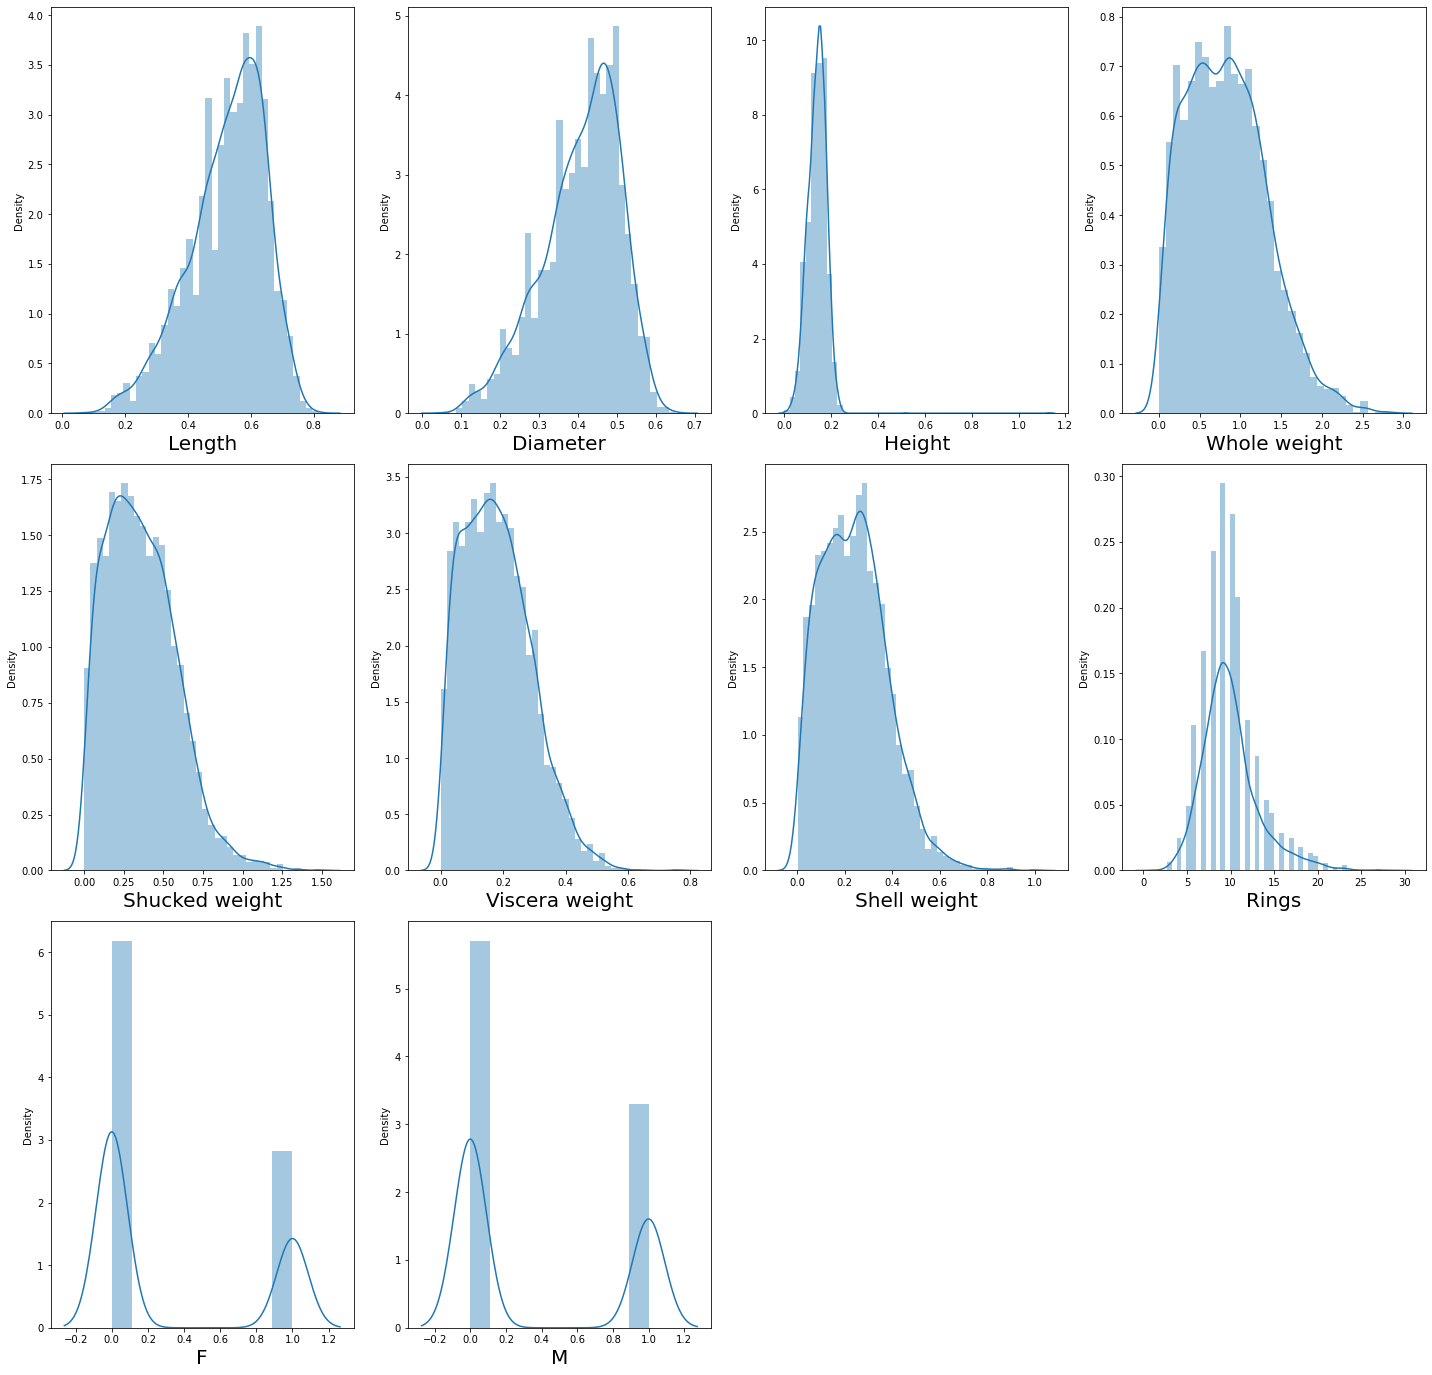

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if (plotnumber<=20):
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

from the above charts we can see that most of the columns are normally distributed except there is some skewness in some columns namely, Whole weight, Viscera weight, Shell weight, Shucked weight

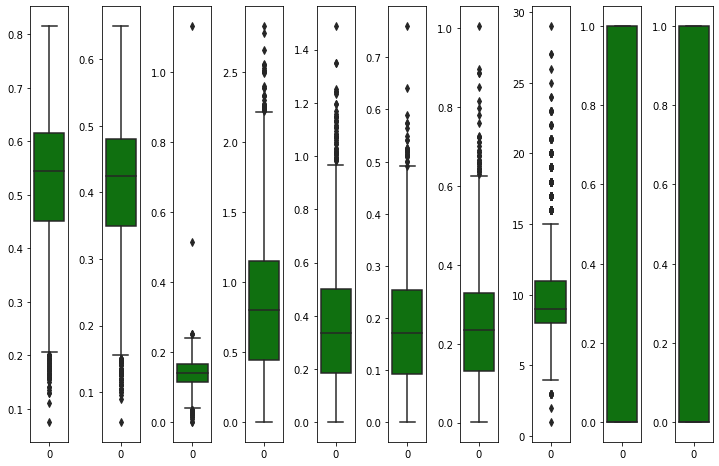

In [19]:
collist=data.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,ncol*3))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=data[collist[i]],color='green',orient="v",)
    plt.tight_layout()

from boxplot we can see that almost all the columns have outliers 

CORRELATION

In [12]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,0.181831
F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.512528
M,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,0.181831,-0.512528,1.000000


<AxesSubplot:>

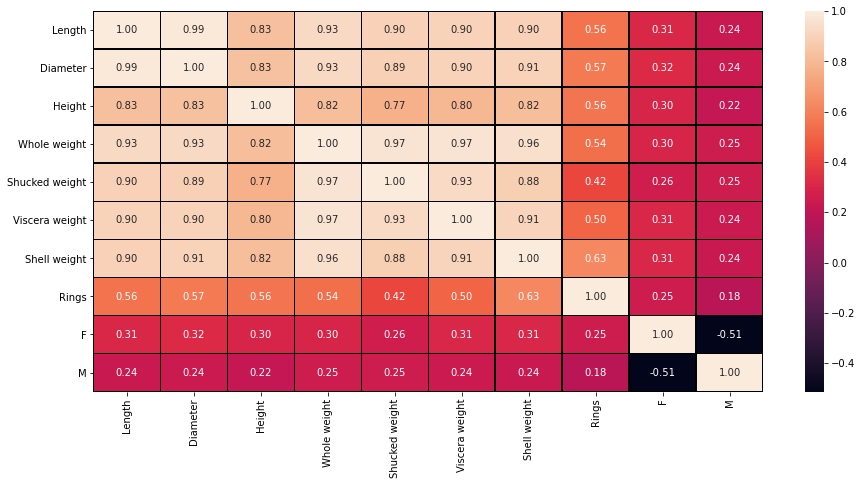

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True, linewidths=0.5,linecolor="black",fmt='.2f')

From the heat map we can infer that 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight have high correlation with the target variable while F and M column has less correelation

Highest Correlation : Shell weight

Lowest Correlation : M

Also we can infer that this data has Multicollinearity issue as independent variables are highly corelated

# Data Preprocessing

In [20]:
y=data['Rings']
x=data.drop('Rings', axis=1)
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:02:57   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.0698      0.267     11.502      0.000       2.547       3.593
Length            -0.4583      1.809     -0.253      0.800      -4.005       3.089
Diameter          11.0751      2.227      4.972      0.000       6.708      15.442
Height            10.7615      1.536      7.005      0.000       7.750      13.773
Whole weight       8.9754      0.725     12.373      0.000       7.553      10.398
Shucked weight   -19.7869      0.817    -24.209      0.000     -21.389     -18.184
Viscera weight   -10.5818      1.294     -8.179      0.000     -13.118      -8.045
Shell weight       8.7418      1.125      7.772      0.000       6.537      10.947
F                  0.8249      0.102      8.056      0.000       0.624       1.026
M                  0.8826      0.096      9.219      0.000       0.695       1.070
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from the summary we can derive that the P value for length is greater that 0.05 and also coef is quite less 

hence we can infer that 'Length' column is affecting the target variable much

# Multicollinearity detection using VIF

In [17]:
# checking Multicollinearity on columns using VIF

y=data['Rings']
x=data.drop('Rings', axis=1)
names=x.columns

for i in range(0, len(names)):
    b=x.loc[:,x.columns==names[i]]
    a=x.loc[:,x.columns!=names[i]]
    model=sm.OLS(b,a)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print("R square value of {} column is {} keeping all other as featurres".format(names[i],(round(rsq,2))))
    print("Variance inflation factor of {} column is {} \n".format(names[i],vif))

R square value of Length column is 1.0 keeping all other as featurres
Variance inflation factor of Length column is 700.93 

R square value of Diameter column is 1.0 keeping all other as featurres
Variance inflation factor of Diameter column is 758.45 

R square value of Height column is 0.98 keeping all other as featurres
Variance inflation factor of Height column is 42.33 

R square value of Whole weight column is 1.0 keeping all other as featurres
Variance inflation factor of Whole weight column is 422.34 

R square value of Shucked weight column is 0.99 keeping all other as featurres
Variance inflation factor of Shucked weight column is 102.17 

R square value of Viscera weight column is 0.98 keeping all other as featurres
Variance inflation factor of Viscera weight column is 63.8 

R square value of Shell weight column is 0.99 keeping all other as featurres
Variance inflation factor of Shell weight column is 81.79 

R square value of F column is -16.07 keeping all other as featurr

as we cen see that 'Length', 'Diameter' , 'Whole weight' have high VIF score causing multicollinearity

hence from summary and VIF score we can try dropping that 'Length' column

In [21]:
data=data.drop(['Length'],axis=1)

In [22]:
# Again checking Multicollinearity on columns using VIF

y=data['Rings']
x=data.drop('Rings', axis=1)
names=x.columns

for i in range(0, len(names)):
    b=x.loc[:,x.columns==names[i]]
    a=x.loc[:,x.columns!=names[i]]
    model=sm.OLS(b,a)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print("R square value of {} column is {} keeping all other as featurres".format(names[i],(round(rsq,2))))
    print("Variance inflation factor of {} column is {} \n".format(names[i],vif))

R square value of Diameter column is 0.98 keeping all other as featurres
Variance inflation factor of Diameter column is 44.52 

R square value of Height column is 0.98 keeping all other as featurres
Variance inflation factor of Height column is 41.89 

R square value of Whole weight column is 1.0 keeping all other as featurres
Variance inflation factor of Whole weight column is 421.9 

R square value of Shucked weight column is 0.99 keeping all other as featurres
Variance inflation factor of Shucked weight column is 102.03 

R square value of Viscera weight column is 0.98 keeping all other as featurres
Variance inflation factor of Viscera weight column is 63.63 

R square value of Shell weight column is 0.99 keeping all other as featurres
Variance inflation factor of Shell weight column is 80.96 

R square value of F column is -16.21 keeping all other as featurres
Variance inflation factor of F column is 0.06 

R square value of M column is -1.13 keeping all other as featurres
Varianc

still we have VIF score of Whole weight very high so we can drop that too

In [23]:
data=data.drop(['Whole weight'],axis=1)

y=data['Rings']
x=data.drop('Rings', axis=1)
names=x.columns

for i in range(0, len(names)):
    b=x.loc[:,x.columns==names[i]]
    a=x.loc[:,x.columns!=names[i]]
    model=sm.OLS(b,a)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print("R square value of {} column is {} keeping all other as featurres".format(names[i],(round(rsq,2))))
    print("Variance inflation factor of {} column is {} \n".format(names[i],vif))

R square value of Diameter column is 0.98 keeping all other as featurres
Variance inflation factor of Diameter column is 44.42 

R square value of Height column is 0.98 keeping all other as featurres
Variance inflation factor of Height column is 41.89 

R square value of Shucked weight column is 0.97 keeping all other as featurres
Variance inflation factor of Shucked weight column is 30.1 

R square value of Viscera weight column is 0.97 keeping all other as featurres
Variance inflation factor of Viscera weight column is 38.75 

R square value of Shell weight column is 0.96 keeping all other as featurres
Variance inflation factor of Shell weight column is 26.31 

R square value of F column is -16.24 keeping all other as featurres
Variance inflation factor of F column is 0.06 

R square value of M column is -1.13 keeping all other as featurres
Variance inflation factor of M column is 0.47 



# Model Development

In [25]:
y=data['Rings']
x=data.drop('Rings', axis=1)

In [27]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# since the outcome has continuous values so we are going to use Linear regression

In [29]:
lr=LinearRegression()

splitting the dataframe

In [31]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("at random state",i,"the model performs well")
        print("at random state : ",i)
        print("training r2_score is ",r2_score(y_train,pred_train)*100)
        print("testing r2_score is ",r2_score(y_test,pred_test)*100)

at random state 79 the model performs well
at random state :  79
training r2_score is  51.97175444284476
testing r2_score is  51.99561230777795
at random state 140 the model performs well
at random state :  140
training r2_score is  52.074411302653786
testing r2_score is  52.064449517686725
at random state 196 the model performs well
at random state :  196
training r2_score is  51.68583951473587
testing r2_score is  51.67394579157239
at random state 207 the model performs well
at random state :  207
training r2_score is  52.02951768656583
testing r2_score is  52.00920728929213
at random state 239 the model performs well
at random state :  239
training r2_score is  52.037774390128014
testing r2_score is  52.01618382821505
at random state 299 the model performs well
at random state :  299
training r2_score is  52.01347051607137
testing r2_score is  51.99645620104657
at random state 369 the model performs well
at random state :  369
training r2_score is  52.030717960730236
testing r2_scor

since at at random state = 140, r2_score is the best 
training r2_score is  52.074411302653786
testing r2_score is  52.064449517686725

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=140)

# Hyperparameter tuning

In [34]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [35]:
model_params={
    'Ridge':{
        'model':Ridge(),
        'params':{
            'alpha':[1e-15,1e-10,1e-8,1e-3,1,5,10,20,30,35,40,45,50,55,100]
        }
    },
    'Lasso':{
        'model':Lasso(),
        'params':{
            'alpha':[1e-15,1e-10,1e-8,1e-3,1,5,10,20,30,35,40,45,50,55,100]
        }
    },
    'Linear Regression':{
        'model':LinearRegression(),
        'params':{
            'n_jobs':[2,4,6]
        }
    }
}

In [36]:
scores=[]

for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [37]:
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,Ridge,0.408468,{'alpha': 20}
1,Lasso,0.407681,{'alpha': 0.001}
2,Linear Regression,0.407555,{'n_jobs': 2}


so from here we can say that model is performing same under all three techniques

In [43]:
# using Linear regression model

lr=LinearRegression(n_jobs=2)
lr.fit(x_train,y_train)
print(f"Regression R2:{lr.score(x_test,y_test)}")

Regression R2:0.5206444951768673


In [44]:
lr.score(x_train,y_train)

0.5207441130265379

In [45]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.5206444951768673

# Model Saving

In [46]:
import pickle
filename='Abalone.pkl'
pickle.dump(lr,open(filename,'wb'))